# Data Science Capstone Project

# Problem Statement

This project aims to predict which customers of the bank are likely to have their loan applications approved based on the details provided by the customer from their submitted online application. 

## 1. Importing Libraries and Data

In [1]:
#import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

In [2]:
#add automatic printing
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
from matplotlib.ticker import PercentFormatter

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

#Linear Regression
from sklearn.linear_model import LinearRegression

#classification models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

#confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

#roc curve
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import RocCurveDisplay

In [4]:
#read data file and basic exploration
df = pd.read_csv("Loan_Train.csv")
df.head(10)
df.index
df.dtypes
df.shape
df.info()
df.describe()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


RangeIndex(start=0, stop=614, step=1)

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

(614, 13)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


## 2. EDA

### 2.1 Data Cleaning

In [5]:
print("No. of duplicates =",df.duplicated().sum()) #check for duplicates

No. of duplicates = 0


In [6]:
print('Missing Data') #check for missing data
df.isna().sum()

Missing Data


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
df1 = df.drop(columns=['Loan_ID']) #dropping column with unusable info
df1.isna().sum()/len(df) #checking precentages of missing values

Gender               0.021173
Married              0.004886
Dependents           0.024430
Education            0.000000
Self_Employed        0.052117
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.035831
Loan_Amount_Term     0.022801
Credit_History       0.081433
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [8]:
#populate null values

#populate object terms with mode
df1['Gender'] = df1['Gender'].fillna(df1['Gender'].mode()[0])
df1['Married'] = df1['Married'].fillna(df1['Married'].mode()[0])
df1['Dependents'] = df1['Dependents'].fillna(df1['Dependents'].mode()[0])
df1['Self_Employed'] = df1['Self_Employed'].fillna(df1['Self_Employed'].mode()[0])
df1['Credit_History'] = df1['Credit_History'].fillna(df1['Credit_History'].mode()[0])
df1['Loan_Amount_Term'] = df1['Loan_Amount_Term'].fillna(df1['Loan_Amount_Term'].mode()[0])

#populate numeric terms with mean
df1['LoanAmount'] = df1['LoanAmount'].fillna(df1['LoanAmount'].mean())

df1.isna().sum() #confirm missing data is filled up

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### 2.2 Data Visualisation

In [9]:
#separating terms to either object type or numeric type
object_terms = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Credit_History','Loan_Amount_Term']
print(object_terms)
numeric_terms = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
print(numeric_terms)

['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History', 'Loan_Amount_Term']
['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']


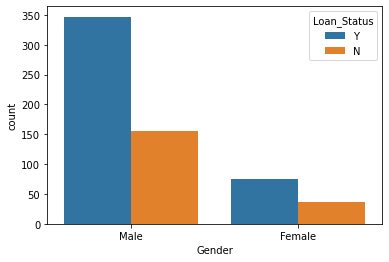

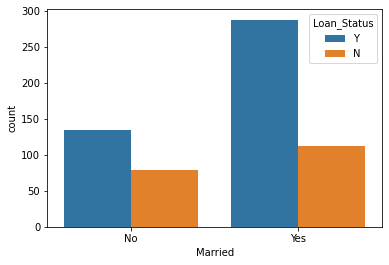

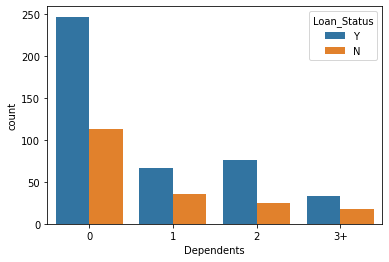

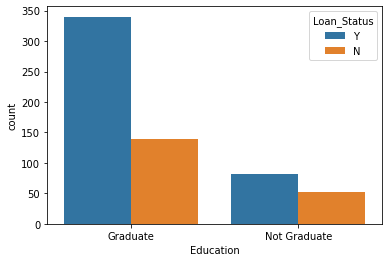

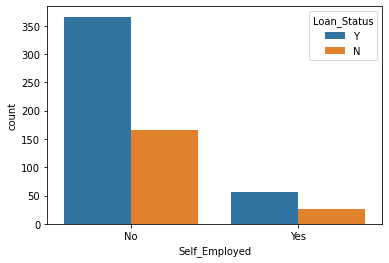

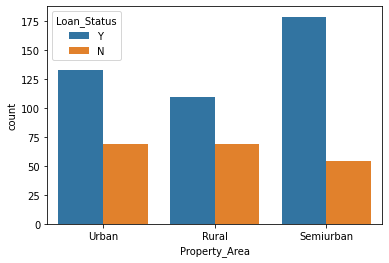

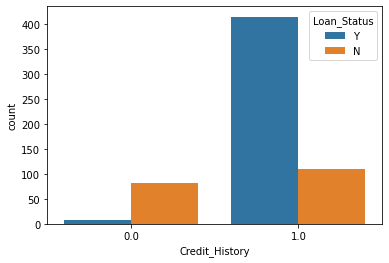

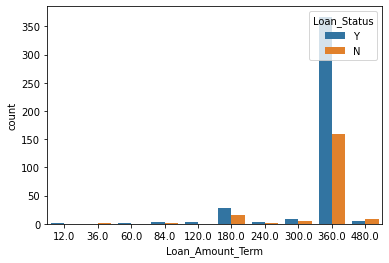

<Figure size 432x288 with 0 Axes>

In [10]:
#plotting all object type terms in a bar chart
for i in object_terms:
    a = sns.countplot(x=df1[i],hue=df1['Loan_Status'])
    b = plt.figure()

Mean for Loan_Status
N    5446.078125
Y    5384.068720
Name: ApplicantIncome, dtype: float64
Standard Deviation for Loan_Status
N    6819.558528
Y    5765.441615
Name: ApplicantIncome, dtype: float64
Mean for Loan_Status
N    1877.807292
Y    1504.516398
Name: CoapplicantIncome, dtype: float64
Standard Deviation for Loan_Status
N    4384.060103
Y    1924.754855
Name: CoapplicantIncome, dtype: float64
Mean for Loan_Status
N    150.945488
Y    144.349606
Name: LoanAmount, dtype: float64
Standard Deviation for Loan_Status
N    83.361163
Y    84.361109
Name: LoanAmount, dtype: float64


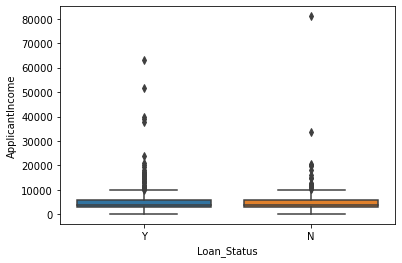

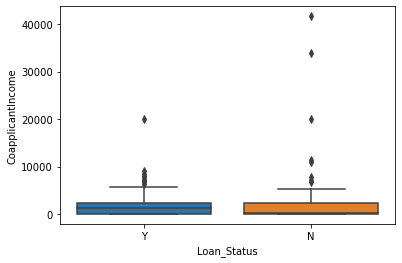

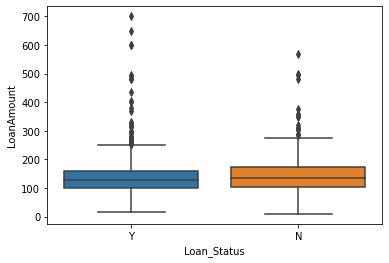

<Figure size 432x288 with 0 Axes>

In [11]:
#plotting all numeric type terms in a boxplot
for i in numeric_terms:
    c = sns.boxplot(x='Loan_Status', y=i, data=df1)
    d = plt.figure()
    mean = df1.groupby('Loan_Status')[i].mean()
    print("Mean for",mean)
    std = df1.groupby('Loan_Status')[i].std()
    print("Standard Deviation for",std)

<AxesSubplot:>

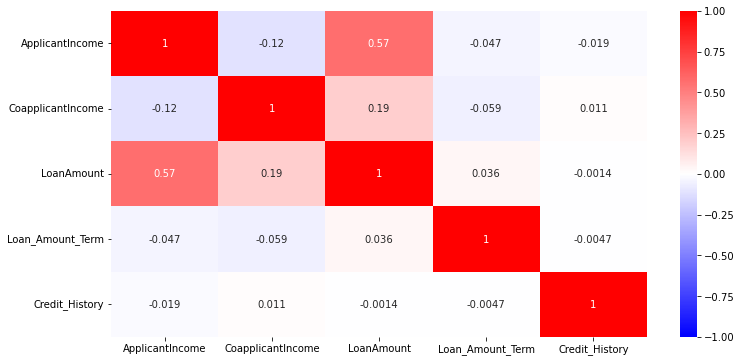

In [12]:
#check for correlation between columns
plt.rcParams['figure.figsize'] = (12,6)
sns.heatmap(df1.corr(), cmap='bwr', vmin=-1, vmax=1, annot=True)

Text(0.5, 0, 'Percentage')

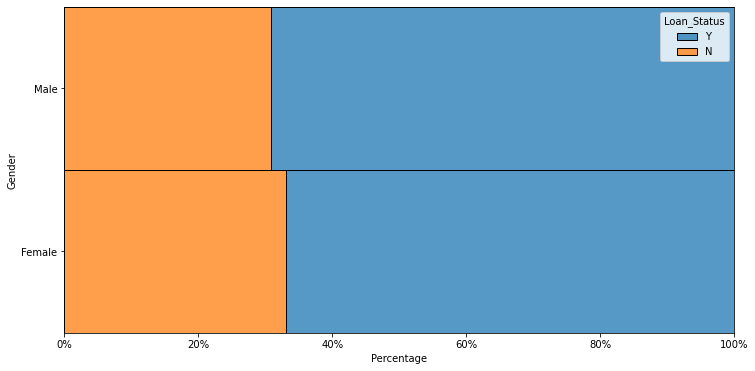

Text(0.5, 0, 'Percentage')

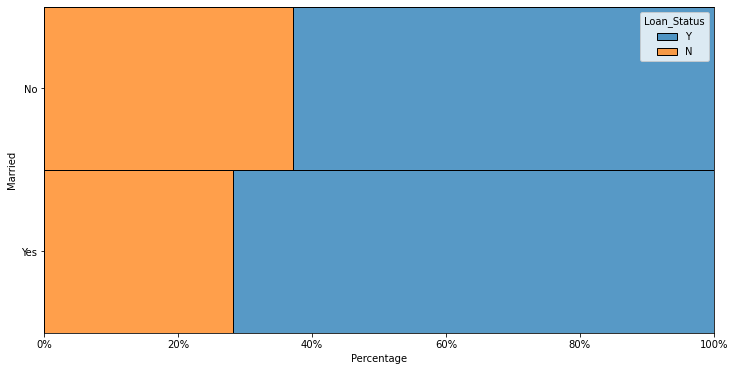

Text(0.5, 0, 'Percentage')

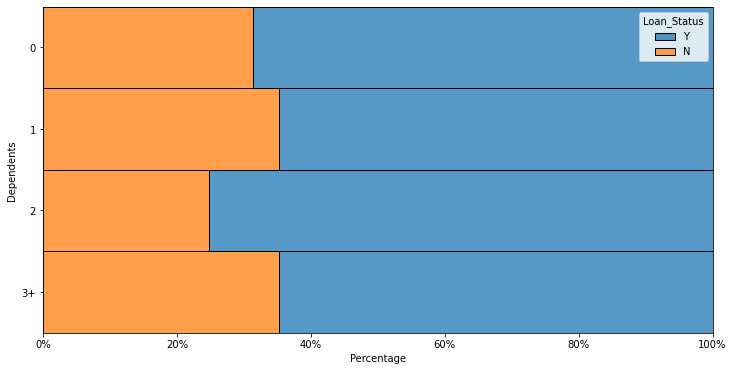

Text(0.5, 0, 'Percentage')

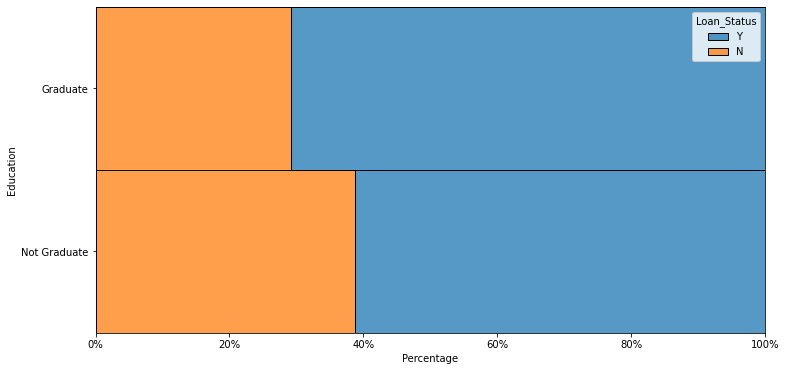

Text(0.5, 0, 'Percentage')

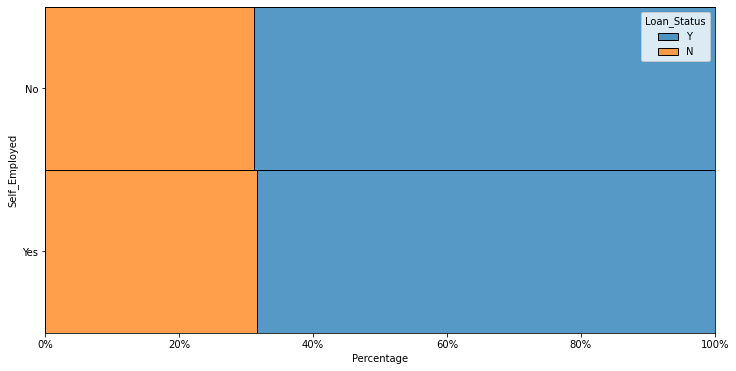

Text(0.5, 0, 'Percentage')

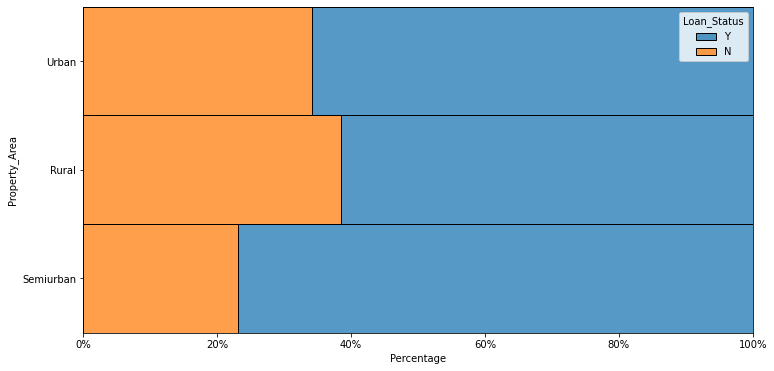

Text(0.5, 0, 'Percentage')

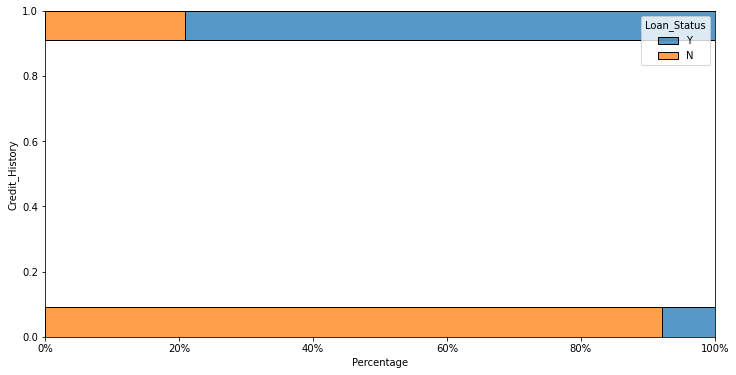

Text(0.5, 0, 'Percentage')

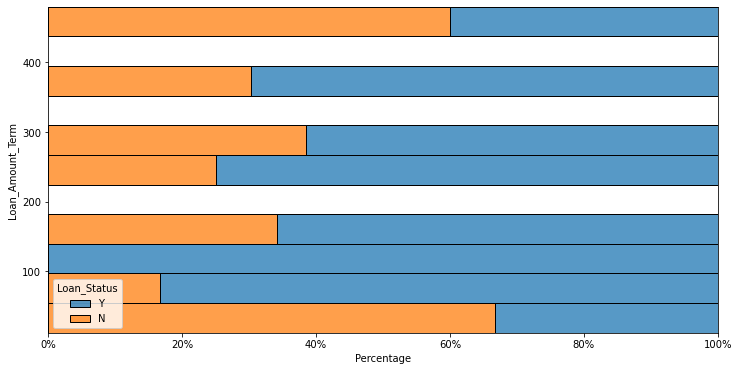

In [13]:
#additional percentage plots for object terms
for i in object_terms:
    ax = sns.histplot(y=i, hue='Loan_Status', multiple='fill', data=df1)
    ax.xaxis.set_major_formatter(PercentFormatter(1))
    ax.set_xlabel('Percentage')
    plt.show()

### 2.3 Analysis

Looking at the plots above, a few findings are observed. 

1) There is little to no correlations for most variables except between LoanAmount and ApplicantIncome or CoapplicantIncome (0.57 & 0.19 respectively).

2) Looking at the bar charts as well as the percentage plots, we can see that;
    
- A person’s gender, self employment status, dependents and loan amount term have little impact on being able to get your bank loan approved. 
- Being a graduate, married and/or living in a semiurban area increases your likelihood of being able to get your bank loan approved. 
- The best indicator of whether a bank loan is approved is based on having a good credit history. 

3) Looking at the means and standard deviations of ApplicantIncome, CoapplicantIncome and LoanAmount, we can see that these variables have very little effect on the loan outcome as the mean and standard deviations for both yes and no are very close to each other. 

## 3. Prediction Model

In [14]:
#encoding
df2 = pd.get_dummies(df1)
df3 = df2.drop(['Gender_Female','Married_No','Education_Graduate','Self_Employed_No','Loan_Status_N'],axis=1)
df3.head(20)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,146.412162,360.0,1.0,1,0,1,0,0,0,0,0,0,0,1,1
1,4583,1508.0,128.000000,360.0,1.0,1,1,0,1,0,0,0,0,1,0,0,0
2,3000,0.0,66.000000,360.0,1.0,1,1,1,0,0,0,0,1,0,0,1,1
3,2583,2358.0,120.000000,360.0,1.0,1,1,1,0,0,0,1,0,0,0,1,1
4,6000,0.0,141.000000,360.0,1.0,1,0,1,0,0,0,0,0,0,0,1,1
5,5417,4196.0,267.000000,360.0,1.0,1,1,0,0,1,0,0,1,0,0,1,1
6,2333,1516.0,95.000000,360.0,1.0,1,1,1,0,0,0,1,0,0,0,1,1
7,3036,2504.0,158.000000,360.0,0.0,1,1,0,0,0,1,0,0,0,1,0,0
8,4006,1526.0,168.000000,360.0,1.0,1,1,0,0,1,0,0,0,0,0,1,1
9,12841,10968.0,349.000000,360.0,1.0,1,1,0,1,0,0,0,0,0,1,0,0


In [15]:
#train test split
y = df3['Loan_Status_Y']
X = df3.drop(columns='Loan_Status_Y')

y
X.head()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

X_train.shape
X_test.shape
y_train.shape
y_test.shape

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status_Y, Length: 614, dtype: uint8

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,146.412162,360.0,1.0,1,0,1,0,0,0,0,0,0,0,1
1,4583,1508.0,128.000000,360.0,1.0,1,1,0,1,0,0,0,0,1,0,0
2,3000,0.0,66.000000,360.0,1.0,1,1,1,0,0,0,0,1,0,0,1
3,2583,2358.0,120.000000,360.0,1.0,1,1,1,0,0,0,1,0,0,0,1
4,6000,0.0,141.000000,360.0,1.0,1,0,1,0,0,0,0,0,0,0,1


(552, 16)

(62, 16)

(552,)

(62,)

### 3.1 KNearest Neighbors

KNeighborsClassifier(n_neighbors=1)

0.5806451612903226
0.49709639953542395


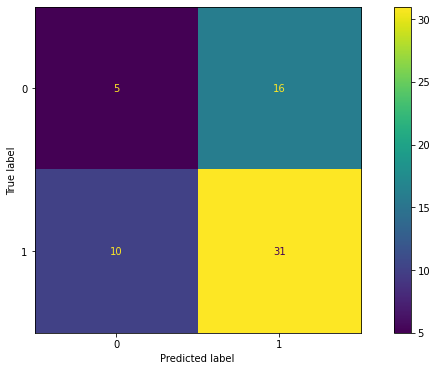

In [16]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print (accuracy_score(y_test, y_pred))
print (roc_auc_score(y_test, y_pred))
cm_display = ConfusionMatrixDisplay(cm).plot() 

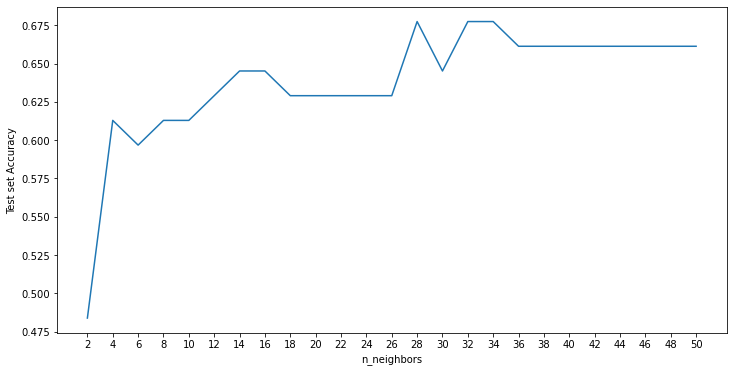

In [17]:
#finding optimized accuracy
scores = []

for n in range(2,51,2):
    knn = KNeighborsClassifier(n_neighbors=n)
    _ = knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
    
_ = plt.plot(scores)                                       
_ = plt.xticks(ticks=range(25),labels=range(2,51,2))     
_ = plt.xlabel('n_neighbors')
_ = plt.ylabel('Test set Accuracy')

KNeighborsClassifier(n_neighbors=32)

0.6774193548387096
0.5238095238095238


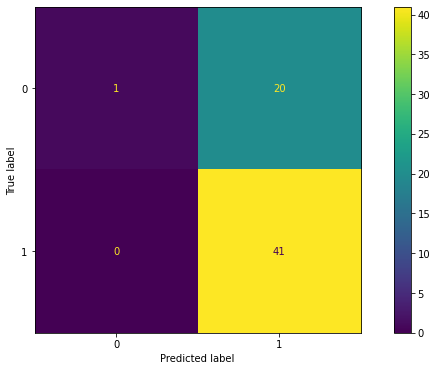

In [18]:
#finding the accuracy of the improved model
knn = KNeighborsClassifier(n_neighbors = 32)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print (accuracy_score(y_test, y_pred))
print (roc_auc_score(y_test, y_pred))
cm_display = ConfusionMatrixDisplay(cm).plot() 

array([0, 1], dtype=uint8)

array([[0.25   , 0.75   ],
       [0.40625, 0.59375],
       [0.21875, 0.78125],
       [0.3125 , 0.6875 ],
       [0.375  , 0.625  ],
       [0.15625, 0.84375],
       [0.3125 , 0.6875 ],
       [0.34375, 0.65625],
       [0.40625, 0.59375],
       [0.1875 , 0.8125 ],
       [0.46875, 0.53125],
       [0.28125, 0.71875],
       [0.4375 , 0.5625 ],
       [0.1875 , 0.8125 ],
       [0.28125, 0.71875],
       [0.21875, 0.78125],
       [0.46875, 0.53125],
       [0.34375, 0.65625],
       [0.3125 , 0.6875 ],
       [0.46875, 0.53125],
       [0.21875, 0.78125],
       [0.3125 , 0.6875 ],
       [0.46875, 0.53125],
       [0.34375, 0.65625],
       [0.28125, 0.71875],
       [0.3125 , 0.6875 ],
       [0.09375, 0.90625],
       [0.34375, 0.65625],
       [0.28125, 0.71875],
       [0.25   , 0.75   ],
       [0.25   , 0.75   ],
       [0.34375, 0.65625],
       [0.34375, 0.65625],
       [0.25   , 0.75   ],
       [0.25   , 0.75   ],
       [0.34375, 0.65625],
       [0.28125, 0.71875],
 

array([0.75   , 0.59375, 0.78125, 0.6875 , 0.625  , 0.84375, 0.6875 ,
       0.65625, 0.59375, 0.8125 , 0.53125, 0.71875, 0.5625 , 0.8125 ,
       0.71875, 0.78125, 0.53125, 0.65625, 0.6875 , 0.53125, 0.78125,
       0.6875 , 0.53125, 0.65625, 0.71875, 0.6875 , 0.90625, 0.65625,
       0.71875, 0.75   , 0.75   , 0.65625, 0.65625, 0.75   , 0.75   ,
       0.65625, 0.71875, 0.6875 , 0.71875, 0.90625, 0.6875 , 0.875  ,
       0.75   , 0.75   , 0.875  , 0.75   , 0.75   , 0.65625, 0.78125,
       0.53125, 0.625  , 0.75   , 0.78125, 0.65625, 0.78125, 0.5    ,
       0.71875, 0.65625, 0.625  , 0.71875, 0.75   , 0.75   ])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1], dtype=uint8)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False])

array([0.75   , 0.59375, 0.78125, 0.6875 , 0.625  , 0.84375, 0.6875 ,
       0.65625, 0.59375, 0.8125 , 0.53125, 0.71875, 0.5625 , 0.8125 ,
       0.71875, 0.78125, 0.53125, 0.65625, 0.6875 , 0.53125, 0.78125,
       0.6875 , 0.53125, 0.65625, 0.71875, 0.6875 , 0.90625, 0.65625,
       0.71875, 0.75   , 0.75   , 0.65625, 0.65625, 0.75   , 0.75   ,
       0.65625, 0.71875, 0.6875 , 0.71875, 0.90625, 0.6875 , 0.875  ,
       0.75   , 0.75   , 0.875  , 0.75   , 0.75   , 0.65625, 0.78125,
       0.53125, 0.625  , 0.75   , 0.78125, 0.65625, 0.78125, 0.5    ,
       0.71875, 0.65625, 0.625  , 0.71875, 0.75   , 0.75   ])

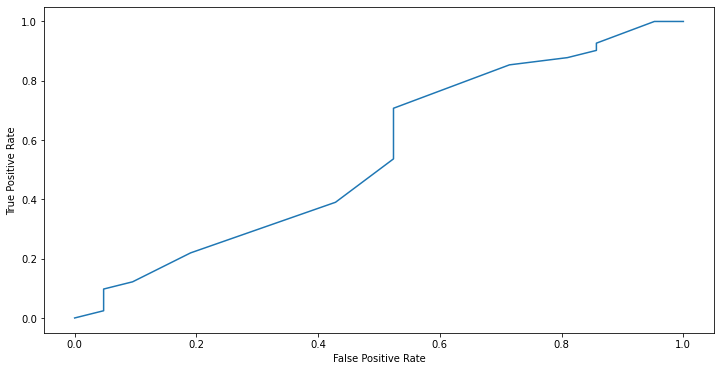

In [19]:
#plotting ROC curve
knn.classes_
knn.predict_proba(X_test)
knn.predict_proba(X_test)[:,1]
knn.predict(X_test)
knn.predict_proba(X_test)[:,1] == knn.predict(X_test)
y_score = knn.predict_proba(X_test)[:,1] #returns probabilities of a classification label
y_score


fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=knn.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

### 3.2 Logistic Regression

C:\Users\emp9124250\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

[[ 7 14]
 [ 1 40]]
0.7580645161290323
0.6544715447154472


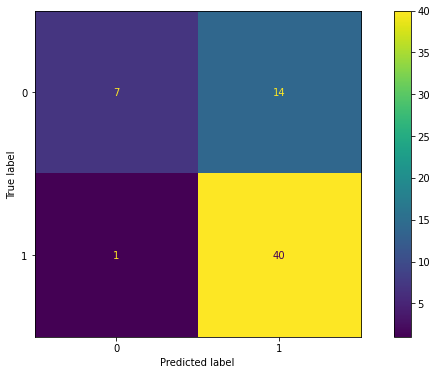

In [20]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred1 = logreg.predict(X_test)

cm1 = confusion_matrix(y_test, y_pred1)
print(cm1)
print (accuracy_score(y_test, y_pred1))
print (roc_auc_score(y_test, y_pred1))
cm_display = ConfusionMatrixDisplay(cm1).plot()

array([0, 1], dtype=uint8)

array([[0.11572835, 0.88427165],
       [0.09880519, 0.90119481],
       [0.19946077, 0.80053923],
       [0.22316385, 0.77683615],
       [0.12623203, 0.87376797],
       [0.29174311, 0.70825689],
       [0.08761083, 0.91238917],
       [0.1622366 , 0.8377634 ],
       [0.38462142, 0.61537858],
       [0.27418057, 0.72581943],
       [0.66832119, 0.33167881],
       [0.22342533, 0.77657467],
       [0.29278277, 0.70721723],
       [0.28420508, 0.71579492],
       [0.18147724, 0.81852276],
       [0.16393629, 0.83606371],
       [0.22894564, 0.77105436],
       [0.17254911, 0.82745089],
       [0.15941229, 0.84058771],
       [0.04150414, 0.95849586],
       [0.1987833 , 0.8012167 ],
       [0.12573684, 0.87426316],
       [0.16778136, 0.83221864],
       [0.16006692, 0.83993308],
       [0.29819288, 0.70180712],
       [0.33446344, 0.66553656],
       [0.41099792, 0.58900208],
       [0.13632028, 0.86367972],
       [0.11007152, 0.88992848],
       [0.11127589, 0.88872411],
       [0.

array([0.88427165, 0.90119481, 0.80053923, 0.77683615, 0.87376797,
       0.70825689, 0.91238917, 0.8377634 , 0.61537858, 0.72581943,
       0.33167881, 0.77657467, 0.70721723, 0.71579492, 0.81852276,
       0.83606371, 0.77105436, 0.82745089, 0.84058771, 0.95849586,
       0.8012167 , 0.87426316, 0.83221864, 0.83993308, 0.70180712,
       0.66553656, 0.58900208, 0.86367972, 0.88992848, 0.88872411,
       0.83739467, 0.89231044, 0.84181529, 0.72437654, 0.70469012,
       0.08946084, 0.77832652, 0.7609321 , 0.90989717, 0.82609722,
       0.74678366, 0.60457069, 0.72359644, 0.78935555, 0.74596922,
       0.86503458, 0.67488259, 0.15273339, 0.13798209, 0.24719811,
       0.69416148, 0.85740593, 0.09804366, 0.67491075, 0.77389199,
       0.74638345, 0.67754462, 0.71520065, 0.09421694, 0.90014   ,
       0.21527494, 0.82810829])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1], dtype=uint8)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False])

array([0.88427165, 0.90119481, 0.80053923, 0.77683615, 0.87376797,
       0.70825689, 0.91238917, 0.8377634 , 0.61537858, 0.72581943,
       0.33167881, 0.77657467, 0.70721723, 0.71579492, 0.81852276,
       0.83606371, 0.77105436, 0.82745089, 0.84058771, 0.95849586,
       0.8012167 , 0.87426316, 0.83221864, 0.83993308, 0.70180712,
       0.66553656, 0.58900208, 0.86367972, 0.88992848, 0.88872411,
       0.83739467, 0.89231044, 0.84181529, 0.72437654, 0.70469012,
       0.08946084, 0.77832652, 0.7609321 , 0.90989717, 0.82609722,
       0.74678366, 0.60457069, 0.72359644, 0.78935555, 0.74596922,
       0.86503458, 0.67488259, 0.15273339, 0.13798209, 0.24719811,
       0.69416148, 0.85740593, 0.09804366, 0.67491075, 0.77389199,
       0.74638345, 0.67754462, 0.71520065, 0.09421694, 0.90014   ,
       0.21527494, 0.82810829])

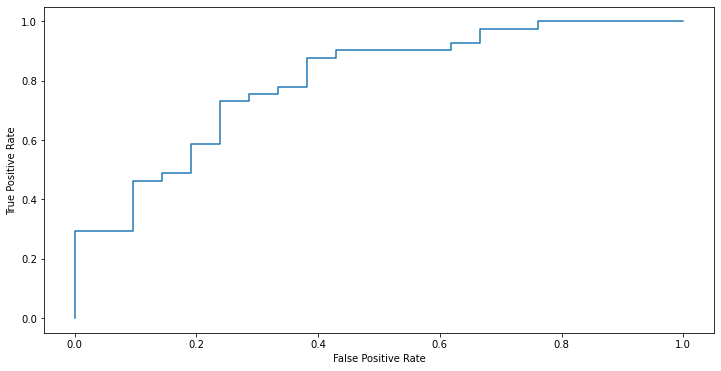

In [21]:
#plotting ROC curve
logreg.classes_
logreg.predict_proba(X_test)
logreg.predict_proba(X_test)[:,1]
logreg.predict(X_test)
logreg.predict_proba(X_test)[:,1] == logreg.predict(X_test)
y_score = logreg.predict_proba(X_test)[:,1] #returns probabilities of a classification label
y_score


fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=logreg.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

### 3.3 Decision Tree

DecisionTreeClassifier()

[[11 10]
 [12 29]]
0.6451612903225806
0.6155632984901277


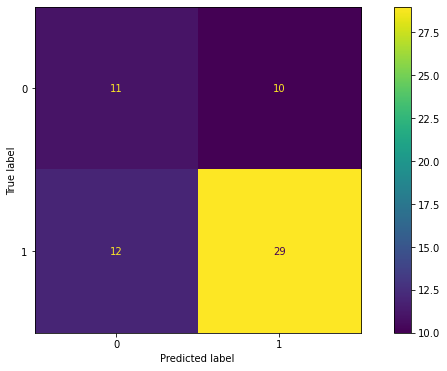

In [22]:
dt = DecisionTreeClassifier().fit(X_train,y_train)

dt.fit(X_train, y_train)
y_pred2 = dt.predict(X_test)

cm2 = confusion_matrix(y_test, y_pred2)
print(cm2)
print (accuracy_score(y_test, y_pred2))
print (roc_auc_score(y_test, y_pred2))
cm_display = ConfusionMatrixDisplay(cm2).plot()

array([0, 1], dtype=uint8)

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.

array([1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1.,
       1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1.,
       1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1.])

array([1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1], dtype=uint8)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

array([1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1.,
       1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1.,
       1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1.])

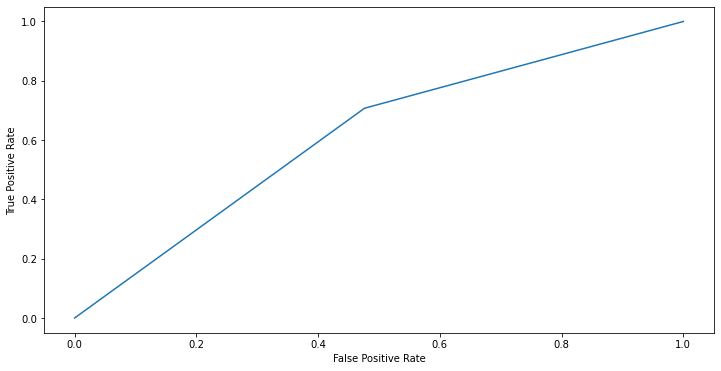

In [23]:
#plotting ROC curve
dt.classes_
dt.predict_proba(X_test)
dt.predict_proba(X_test)[:,1]
dt.predict(X_test)
dt.predict_proba(X_test)[:,1] == dt.predict(X_test)
y_score = dt.predict_proba(X_test)[:,1] #returns probabilities of a classification label
y_score


fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=dt.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

### 3.4 Prediction Results
- Three models were used for the predictions.
- Two key metrics were used to determine the capability of the models being Accuracy and ROC. 
- With better accuracy and ROC, the model is more capable in predicting which applicants are more likely to be approved. 
- As such, Logistic Regression is the most optimal model to use to make predictions regarding bank approval based on a given dataset. 